In [33]:
import pandas as pd
import numpy as np

In [34]:
df=pd.read_csv('Loan_Data.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### EDA

In [36]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [37]:
#разделим по видам признаков
bin_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']
cat_features = ['Dependents', 'Property_Area']
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

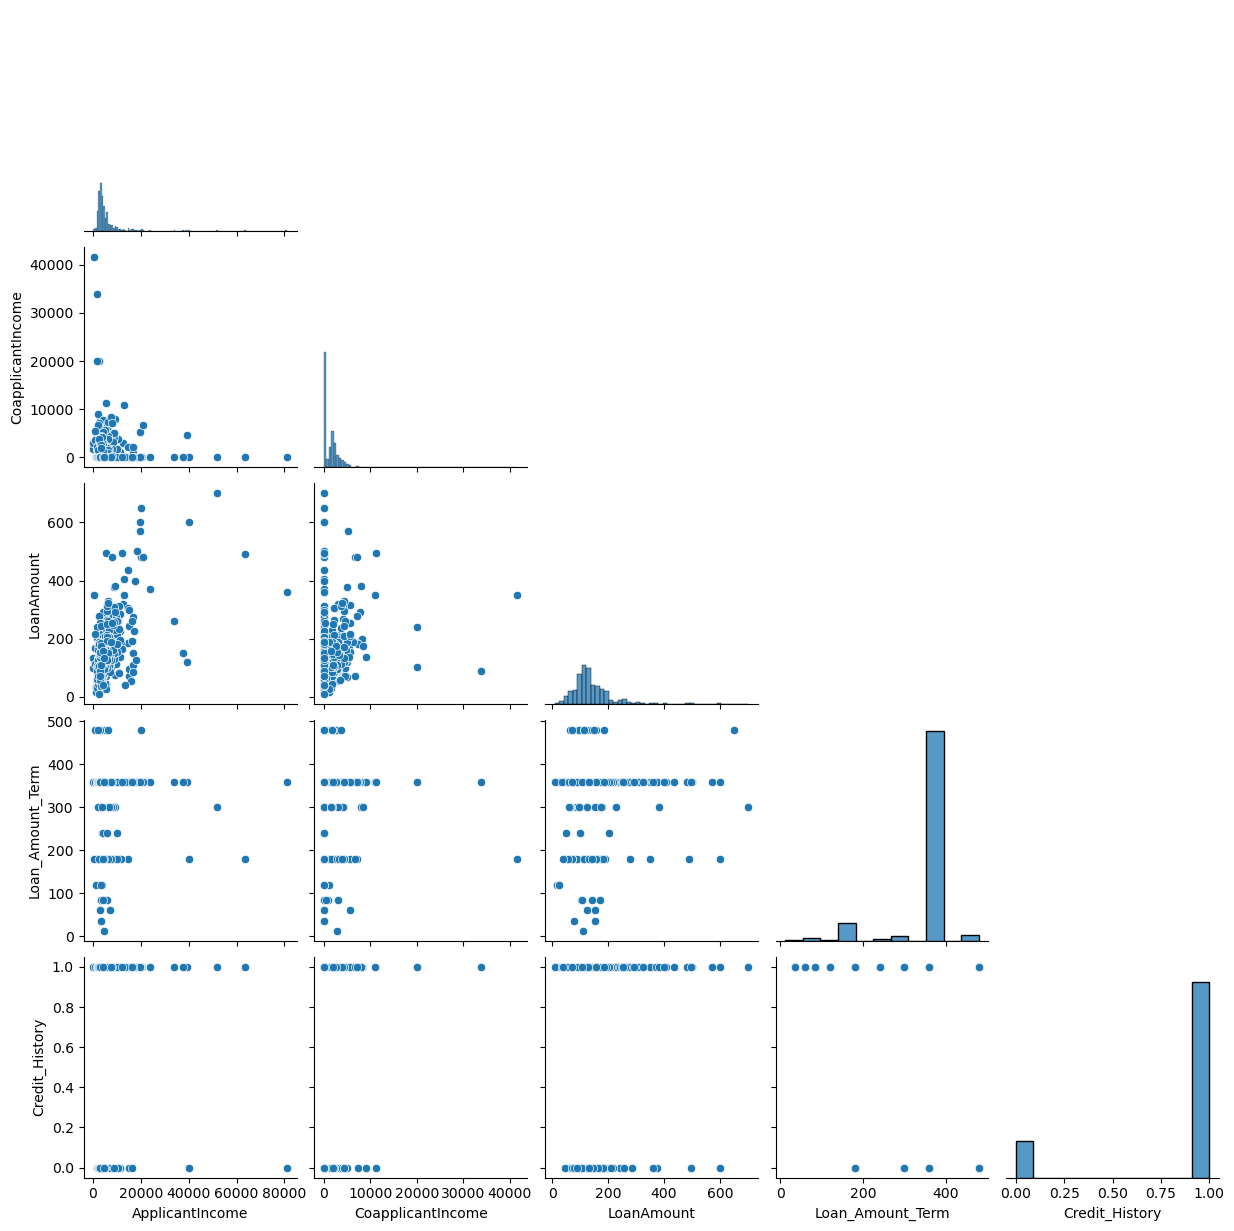

In [39]:
sns.pairplot(df,corner=True)

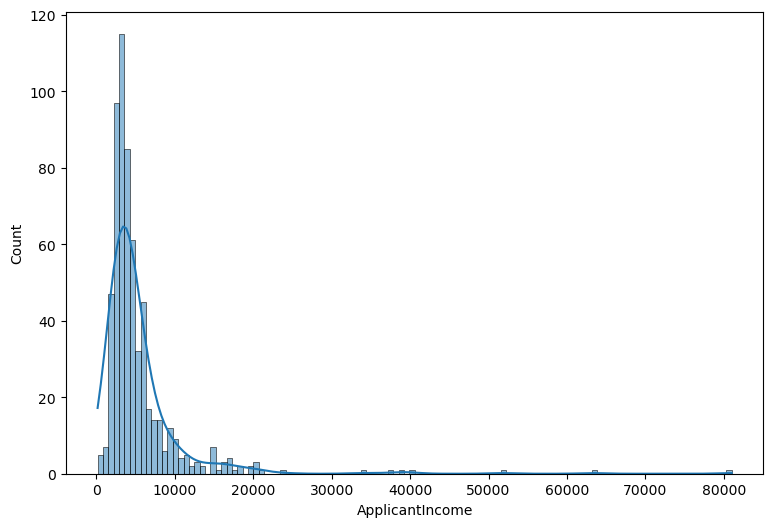

In [40]:
plt.figure(figsize=(9, 6))

sns.histplot(x="ApplicantIncome", data=df, kde=True, lw=2);

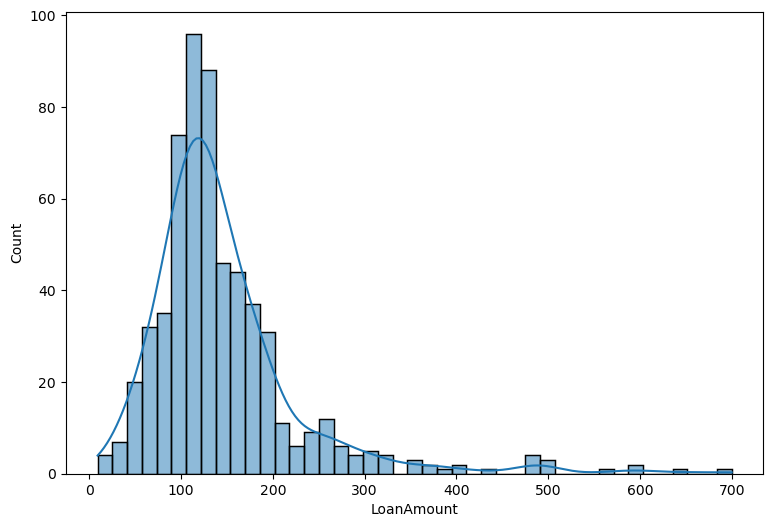

In [41]:
plt.figure(figsize=(9, 6))

sns.histplot(x="LoanAmount", data=df, kde=True, lw=2);

<Axes: xlabel='Married', ylabel='count'>

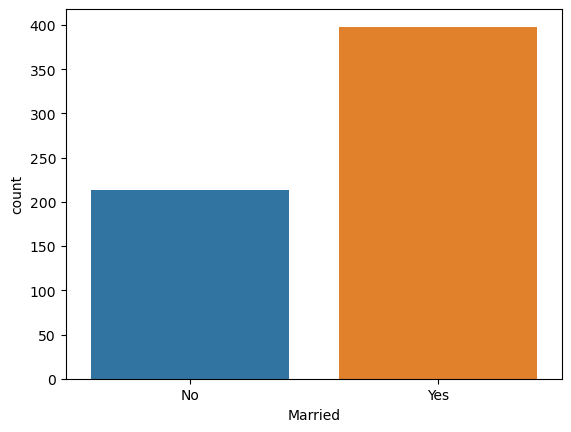

In [42]:
sns.countplot(x='Married', data=df)

<Axes: xlabel='Education', ylabel='count'>

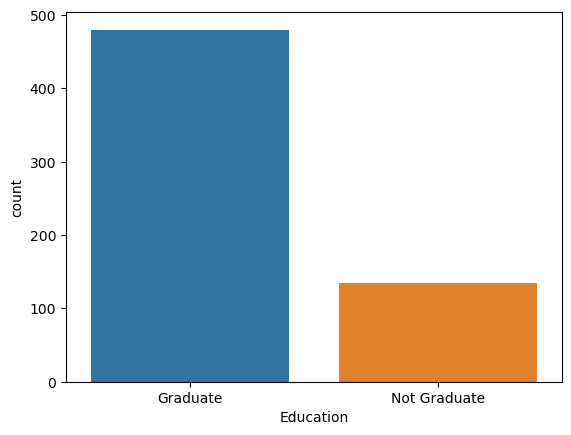

In [43]:
sns.countplot(x='Education', data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

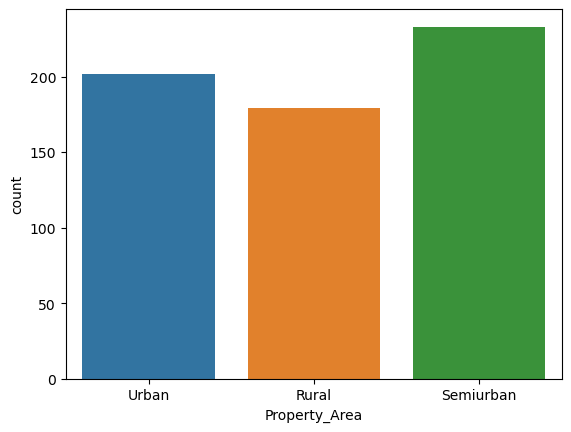

In [44]:
sns.countplot(x='Property_Area', data=df)

<Axes: xlabel='Dependents', ylabel='count'>

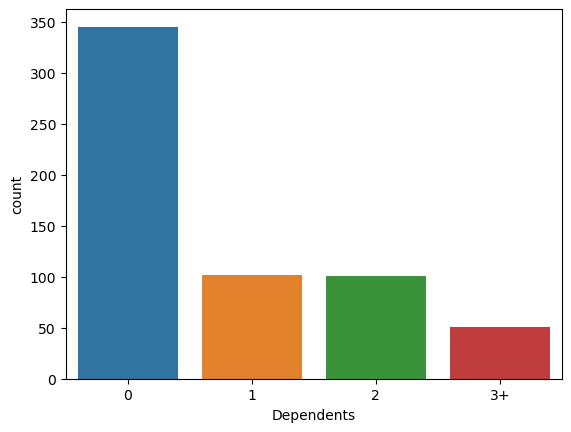

In [45]:
sns.countplot(x='Dependents', data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

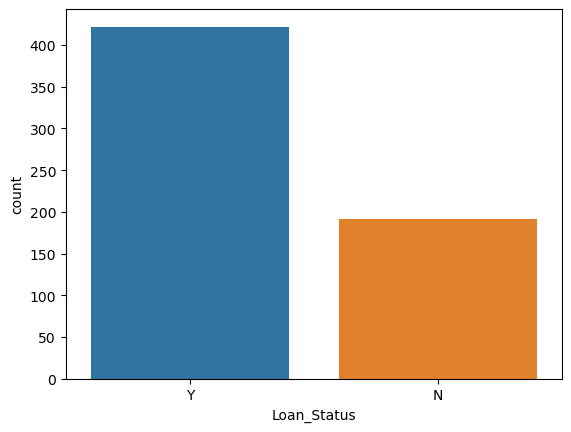

In [46]:
sns.countplot(x='Loan_Status', data=df)

C:\Users\User\AppData\Local\Temp\ipykernel_1296\3823370734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


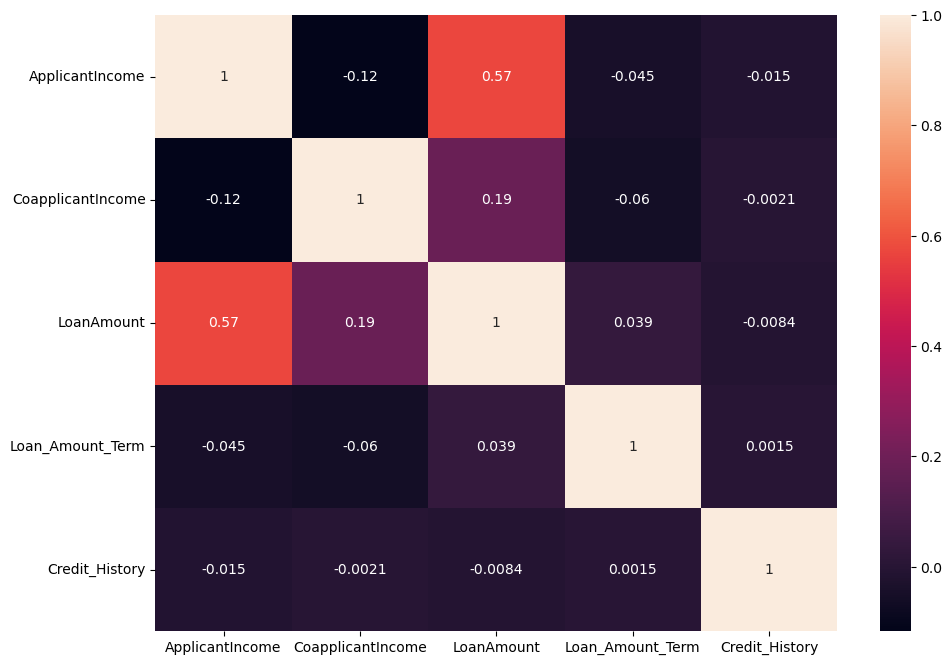

In [47]:
corr=df.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(corr, annot=True);

In [48]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


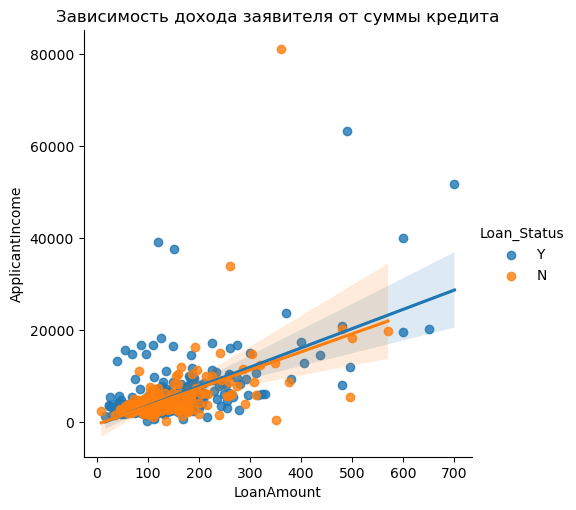

In [49]:

sns.lmplot(x='LoanAmount', y='ApplicantIncome', data=df, hue='Loan_Status')
plt.title('Зависимость дохода заявителя от суммы кредита');

In [50]:
#разделение данных на тест и тренир
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [51]:
#создадим пайплайн который заменит выбросы на медиану и удалит ненужный признак Loan ID
class DataPipeline():
    """Подготовка исходных данных"""
    
    def __init__(self, num_features, cat_features, bin_features):
        """Параметры класса"""
        self.num_features = num_features
        self.cat_features = cat_features
        self.bin_features = bin_features   

        self.quans_99 = {}
        self.medians = {}   
        
    def fit(self, df, y=None):
        """Сохранение статистик"""
        
        for num_col in self.num_features:
            q_99 = df[num_col].quantile(q=0.99)
            self.quans_99[num_col] = q_99
            self.medians[num_col] = df[num_col].median()

        return self
        
    def transform(self, df, y=None):
        """Трансформация данных"""
        
        for num_col in self.num_features:
            df.loc[df[num_col] > self.quans_99[num_col], num_col] = self.medians[num_col]


        if 'Loan_ID' in df.columns:
            df.drop(columns='Loan_ID', inplace=True)

  
        return df

In [52]:
#масштабируем количественные признаки с помощью Стандартизации и кодируем бинарные и категор-ые признаки
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


cat_transforms = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)


bin_transforms = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first', handle_unknown='ignore')
)

num_transforms = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [53]:
from sklearn.compose import ColumnTransformer

features = ColumnTransformer([
    ('cat', cat_transforms, cat_features),
    ('bin', bin_transforms, bin_features),
    ('num', num_transforms, num_features)
])

features.fit_transform(X_train).shape

(491, 16)

In [54]:
pipe = make_pipeline(
    DataPipeline(num_features=num_features,
                 cat_features=cat_features,
                 bin_features=bin_features),
    features
)

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.02153821,
         0.08253187,  0.28408261],
       [ 0.        ,  0.        ,  0.        , ..., -0.25817961,
        -0.59132242,  0.28408261],
       [ 1.        ,  0.        ,  0.        , ..., -0.83583217,
        -0.1931358 ,  0.28408261],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.83583217,
         0.55729284,  0.28408261],
       [ 1.        ,  0.        ,  0.        , ...,  1.18565796,
        -0.28502502,  0.28408261],
       [ 1.        ,  0.        ,  0.        , ...,  0.65149095,
        -1.28049158,  0.28408261]])

In [55]:
display(pipe.steps[0][1].medians,
        pipe.steps[0][1].quans_99)

{'ApplicantIncome': 3750.0,
 'CoapplicantIncome': 1250.0,
 'LoanAmount': 126.0,
 'Loan_Amount_Term': 360.0}

{'ApplicantIncome': 34233.30000000009,
 'CoapplicantIncome': 11001.200000000008,
 'LoanAmount': 495.26,
 'Loan_Amount_Term': 480.0}

In [56]:
#Обучение модели
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
print("TRAIN")
print(classification_report(pred_train, y_train))
print('TEST')
print(classification_report(pred_test, y_test))

TRAIN
              precision    recall  f1-score   support

           N       0.45      0.93      0.61        74
           Y       0.99      0.80      0.88       417

    accuracy                           0.82       491
   macro avg       0.72      0.86      0.74       491
weighted avg       0.90      0.82      0.84       491

TEST
              precision    recall  f1-score   support

           N       0.53      0.74      0.62        27
           Y       0.92      0.81      0.86        96

    accuracy                           0.80       123
   macro avg       0.72      0.78      0.74       123
weighted avg       0.83      0.80      0.81       123



#### Выводы:
Precision (Точность):

Для класса"N"(кредит не одобрен)-0.45: Это говорит о что из всех предсказанных как "N",только 45% действительно не были одобрены.
Для класса"Y"(кредит одобрен)-0.99: 99% из предсказанных как "Y" были действительно одобрены.
Recall (Полнота):

Для класса "N"-0.93: Это означает, что модель обнаруживает 93% всех действительных случаев "N".
Для класса "Y"-0.80: Модель обнаруживает 80% всех действительных случаев "Y".

Accuracy (Точность):

Общая точность модели-0.82:82% предсказаний модели правильны.
Для тестового набора:
Precision (Точность):
Для класса "N" - 0.53.
Для класса "Y" - 0.92.
Recall (Полнота):
Для класса "N" - 0.74.
Для класса "Y" - 0.81.
F1-Score:

Для класса "N" - 0.62.
Для класса "Y" - 0.86.
Accuracy (Точность):

Общая точность модели - 0.80: Это означает, что 80% предсказаний модели правильны.